# BUSINESS PROBLEM
___
<img src="./assets/banner.gif"
     alt="head"
     style="float: center; margin-center: 2px;"><br>

While everyone recognizes the importance of maintaining existing customers and therefore improving their lifetime value, there is very little banks can do about customer churn when they don't anticipate it coming in the first place. Predicting attrition becomes critical in this situation, especially when unambiguous consumer feedback is lacking. Precise prediction enables advertisers and client experience groups to be imaginative and proactive in their offering to the client.

XYZ Bank (read: fictional) is a mature financial institution based in Eastern North America. Recent advance in technology and rise in BaaS is a real threat for them as they can lure away the existing clientele. The bank has existing data of their clients. Based on the data available, the bank wants to know whom of them are in risk of churning. 

This analysis focuses on the behavior of bank clients who are more likely to leave the bank (<strong>i.e. close their bank account</strong>, churn).

# IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports_and_functions.packages import *
import imports_and_functions as fn

In [3]:
# notebook styling
try:
    from jupyterthemes import jtplot
except:
    !pip install jupyterthemes
    from jupyterthemes import jtplot
# jtplot.reset() # reset notebook styling
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

# OBTAIN

The data for this analysis is obtained from <i>Kaggle</i>, titled <b>"Credit Card customers"</b> uploaded by Sakshi Goyal. Which can be found [here](https://www.kaggle.com/sakshigoyal7/credit-card-customers), this dataset was originally obtained from [LEAPS Analyttica](https://leaps.analyttica.com/sample_cases/11). A copy of the data is in this repository at `/data/BankChurners.csv`.

This dataset contains data of more than 10000 credit card accounts with around 19 variables of different types as of a time point and their attrition indicator over the next 6 months. 

Data description is as below:

| Variable | Type | Description |
|:---:|:---:|:---:|
| Clientnum | Num | Client number. Unique identifier for the customer holding the account |
| Attrition_Flag | obj | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age | Num | Demographic variable - Customer's Age in Years |
| Gender | obj | Demographic variable - M=Male, F=Female |
| Dependent_count | Num | Demographic variable - Number of dependents |
| Education_Level | obj | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| Marital_Status | obj | Demographic variable - Married, Single, Divorced, Unknown |
| Income_Category | obj | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) |
| Card_Category | obj | Product Variable - Type of Card (Blue, Silver, Gold, Platinum) |
| Months_on_book | Num | Months on book (Time of Relationship) |
| Total_Relationship_Count | Num | Total no. of products held by the customer |
| Months_Inactive_12_mon | Num | No. of months inactive in the last 12 months |
| Contacts_Count_12_mon | Num | No. of Contacts in the last 12 months |
| Credit_Limit | Num | Credit Limit on the Credit Card |
| Total_Revolving_Bal | Num | Total Revolving Balance on the Credit Card |
| Avg_Open_To_Buy | Num | Open to Buy Credit Line (Average of last 12 months) |
| Total_Amt_Chng_Q4_Q1 | Num | Change in Transaction Amount (Q4 over Q1)  |
| Total_Trans_Amt | Num | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | Num | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | Num | Change in Transaction Count (Q4 over Q1)  |
| Avg_Utilization_Ratio | Num | Average Card Utilization Ratio |

There are unknown category in Education Level, Marital Status, and Income Category. Imputing values for those features does not make sense. And it is understandable why those are unknown in the first place. Information about Education and Marital status is often complicated and confidential; and customers are reluctant to share those information. Same for the income level. It is best for the model to be able to handle when those information is not available and still produce prediction.

Because of this reason those are not imputed in any way for this analysis.

In [4]:
# loading dataset
raw_df = pd.read_csv('./data/BankChurners.csv')
# first view of the dataset
raw_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
# columns of the dataset
raw_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# no duplicates in the dataset
raw_df.CLIENTNUM.duplicated().value_counts()

False    10127
Name: CLIENTNUM, dtype: int64

In [7]:
# dropping customer identifier and unnecessary feature
raw_df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
],
        inplace=True)
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
# looking at the distribution for changing labels to more notebook friendly description
raw_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [9]:
# cleaning text in 'Income_Category'
raw_df['Income_Category'] = raw_df['Income_Category'].apply(
    lambda x: x.replace("$", "")).apply(
        lambda x: x.replace(" - ", "_to_")).apply(
            lambda x: x.replace("120K +", "Above_120K")).apply(
                lambda x: x.replace("Less than 40K", "Less_than_40K"))
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [10]:
raw_df['Income_Category'].value_counts()

Less_than_40K    3561
40K_to_60K       1790
80K_to_120K      1535
60K_to_80K       1402
Unknown          1112
Above_120K        727
Name: Income_Category, dtype: int64

In [11]:
# distribution of target
(raw_df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

There is major class imbalance spotted in the target column.

In [12]:
df = raw_df.copy()
print(f'"df" statistical description: \n{"+"*30}')
display(fn.describe_dataframe(df))
print(f'"df" feature details: \n{"+"*30}\n')
fn.check_duplicates(df, verbose=2, limit_num=50)

"df" statistical description: 
++++++++++++++++++++++++++++++


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Attrition_Flag,10127.0,2,Existing Customer,8500,,,,,,,,object,0
Customer_Age,10127.0,,,,46.33,8.02,26.0,41.0,46.0,52.0,73.0,int64,0
Gender,10127.0,2,F,5358,,,,,,,,object,0
Dependent_count,10127.0,,,,2.35,1.3,0.0,1.0,2.0,3.0,5.0,int64,0
Education_Level,10127.0,7,Graduate,3128,,,,,,,,object,0
Marital_Status,10127.0,4,Married,4687,,,,,,,,object,0
Income_Category,10127.0,6,Less_than_40K,3561,,,,,,,,object,0
Card_Category,10127.0,4,Blue,9436,,,,,,,,object,0
Months_on_book,10127.0,,,,35.93,7.99,13.0,31.0,36.0,40.0,56.0,int64,0
Total_Relationship_Count,10127.0,,,,3.81,1.55,1.0,3.0,4.0,5.0,6.0,int64,0


"df" feature details: 
++++++++++++++++++++++++++++++

Attrition_Flag >> number of uniques: 2
Values:
['Existing Customer' 'Attrited Customer']
____________________________________________________________

Customer_Age >> number of uniques: 45
Values:
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
____________________________________________________________

Gender >> number of uniques: 2
Values:
['M' 'F']
____________________________________________________________

Dependent_count >> number of uniques: 6
Values:
[3 5 4 2 0 1]
____________________________________________________________

Education_Level >> number of uniques: 7
Values:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
____________________________________________________________

Marital_Status >> number of uniques: 4
Values:
['Married' 'Single' 'Unknown' 'Divorced']
_________________________

No null values to deal with. Features have the correct data type. No unknown category is spotted, and statistics does not warrant any closer inspection. 

# SCRUB

In [13]:
# ML friendly labels
churn_map = {'Existing Customer':0, 'Attrited Customer':1}
X = df.drop(columns='Attrition_Flag').copy()
y = df.Attrition_Flag.map(churn_map).copy()

In [14]:
# numeric data is scaled and categorical data is One Hot Encoded
X_segmentation = fn.dataset_processor_segmentation(X, verbose=2)

Numerical columns: 
---------------------
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 
---------------------
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


------
Scaler: StandardScaler, settings: {'copy': True, 'with_mean': True, 'with_std': True}
Encoder: OneHotEncoder, settings: {'categories': 'auto', 'drop': None, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'sparse': False}
------


# MODEL

## Client Segmentation

### Finding "K"

Several k-means models were used to deduce optimal number of segmentation. Number of cluster size used ranged from 1 to 20.

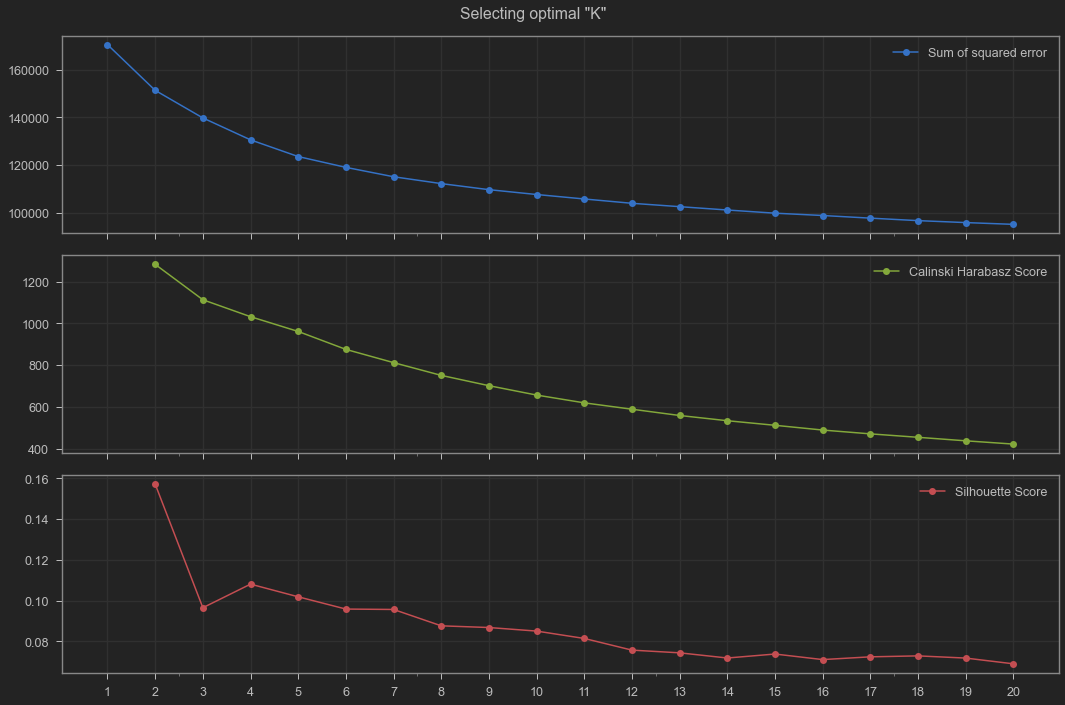

In [15]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = metrics.calinski_harabasz_score(X_segmentation, cluster)
        ss = metrics.silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

Higher Silhouette Coefficient score relates to a model with better defined clusters. And higher Calinski-Harabasz score relates to a model with better defined clusters.

Although by looking at the visual no obvious optimal K can not be spotted.  Based on the `Silhouette Score` and `Sum of squared error` (a.k.a. Elbow plot), 5 segmentation seemed optimal for initial model. `Calinski Harabasz Score` also supports this segmentation. 

Customers are segmented by 5 groups by their characteristics. 

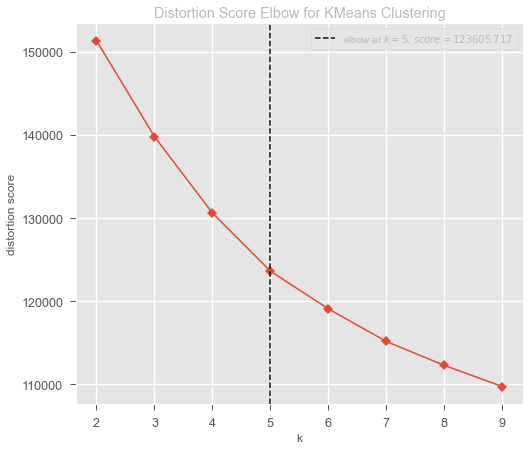

In [16]:
# using yellowbrick to get an idea about the choice of K=5
with plt.style.context('ggplot'):
    kelbow_visualizer(KMeans(random_state=1),
                      X_segmentation,
                      k=(2, 10),
                      timings=False)

Among models run for `K` from a range of 2 to 10, 5 is recommended by yellowbrick package.

In [17]:
# using MeanShift to get an estimate
bandwidth = estimate_bandwidth(X_segmentation, quantile=0.3, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False, n_jobs=-1, max_iter=500)
ms.fit(X_segmentation)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"Number of estimated clusters : {n_clusters_}")

Number of estimated clusters : 5


Mean shift clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids. [(From scikit learn documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

Suggestion of MeanShift supports the initial choice of K=5.

### Selecting "K"

In [18]:
# setting number of cluster to 5.
n_clusters=5

In [19]:
kmeans = KMeans(
    init='k-means++',
    algorithm='auto',
    n_clusters=n_clusters,
    max_iter=1000,
    random_state=1,  # selecting random_state=1 for reproducibility
    verbose=0).fit(X_segmentation)

In [20]:
# using prediction to create a dataframe
clusters = kmeans.predict(X_segmentation)
cluster_df = X_segmentation.copy()
cluster_df['Clusters'] = clusters
cluster_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_60K_to_80K,Income_Category_80K_to_120K,Income_Category_Above_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Clusters
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,-0.266547,0.509840,-0.522785,-0.337598,0.492404,-0.509330,0.844455,-0.584929,-0.259771,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
10123,-0.664382,-0.266547,-1.368442,0.120579,-0.337598,0.492404,-0.479181,1.255524,-0.591639,0.201004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
10124,-0.290150,-1.036462,0.008965,0.763943,0.651940,1.396424,-0.354626,-1.426858,-0.226632,0.269436,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
10125,-2.036565,-0.266547,0.008965,0.120579,0.651940,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [21]:
# distribution of classes (%)
(cluster_df.Clusters.value_counts(1)*100).round(2)

2    30.23
1    26.83
3    19.75
4    13.55
0     9.65
Name: Clusters, dtype: float64

In [22]:
@interact(df=fixed(cluster_df),
          x=cluster_df.columns,
          y=cluster_df.columns,
          z=cluster_df.columns)
def plot_segments(df=cluster_df,
                  x='Customer_Age',
                  y='Months_on_book',
                  z='Credit_Limit'):
    df['Clusters'] = df['Clusters'].astype('str')
    fig = px.scatter_3d(
        df,
        x=x,
        y=y,
        z=z,
        title=
        f'{x.replace("_", " ")}, {y.replace("_", " ")} and, {z.replace("_", " ")} by Clusters',
        color='Clusters',
        template='plotly_dark')
    fig.update_traces(marker=dict(size=2))
    df['Clusters'] = df['Clusters'].astype('int')
    fig.show()

interactive(children=(Dropdown(description='x', options=('Customer_Age', 'Dependent_count', 'Months_on_book', …

Segmentation is not immediately apparent in this visualization. More insights on the segmentation is in the INTERPRET part of this analysis. Using PCA to explore the segmentation.

Using principal component analysis concept for reducing features to visualize the clusters in a three dimensional space.

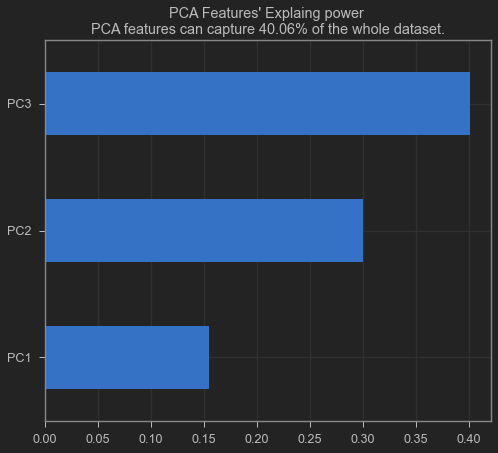

In [23]:
pca = PCA(n_components=3)
pc_feature_names = [f"PC{x}" for x in range(1, pca.n_components + 1)]
pca_data = pca.fit_transform(cluster_df)
pca_df = pd.DataFrame(pca_data, columns=pc_feature_names)
pd.Series(pca.explained_variance_ratio_.cumsum(), index=pc_feature_names).plot(
    kind='barh',
    title=
    f"""PCA Features' Explaing power \nPCA features can capture {((pca.explained_variance_ratio_.cumsum()[-1])*100).round(2)}% of the whole dataset."""
)
plt.grid()
plt.show()
pca_df['Clusters'] = clusters.astype('str')
fig = px.scatter_3d(pca_df,
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    color='Clusters',
                    title='Cluster visualization with the help of PCA',
                    template='plotly_dark')
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=700, height=500, bargap=0.05)
fig.show()

With only forty  percent explainability of the entire dataset by PCA, the clusters exhibit a clear separation between them in a three dimensional space. And thre is a clear separation between clusters in a two dimensional space. I am content with the selected K of 5. This will be further evaluated when performing inter cluster exploration in later part.

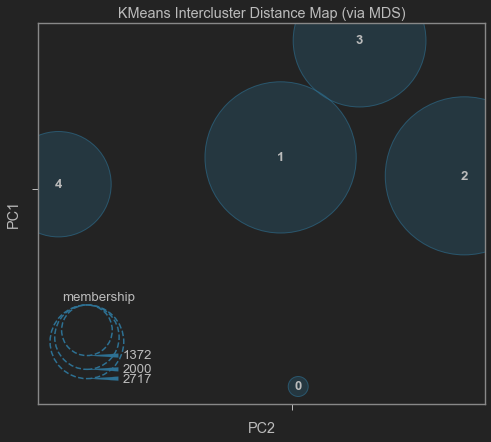

In [24]:
# Using two PC
intercluster_distance(kmeans, X_segmentation, embedding='mds', random_state=12); # 'tsne'

### Verifying Clustering using Random Forest

Newly created `cluster_df` is used to get the feature importance to get insights which features were often used for determining the segmentation. A Random Forest model is used to get feature importance alongside a permutation importance analysis to get the most important features.

In [25]:
X_feat_imp = cluster_df.drop(columns='Clusters').copy()
y_feat_imp = cluster_df.Clusters.copy()

In [26]:
X_feat_imp_train, X_feat_imp_test, y_feat_imp_train, y_feat_imp_test = train_test_split(
    X_feat_imp, y_feat_imp, train_size=.8)

******************************************************************************************
Train accuracy score: 0.9831
Test accuracy score: 0.9368
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       202
           1       0.94      0.93      0.93       512
           2       0.94      0.94      0.94       627
           3       0.93      0.90      0.91       422
           4       0.93      0.98      0.96       263

    accuracy                           0.94      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.94      0.94      0.94      2026

************************************************************


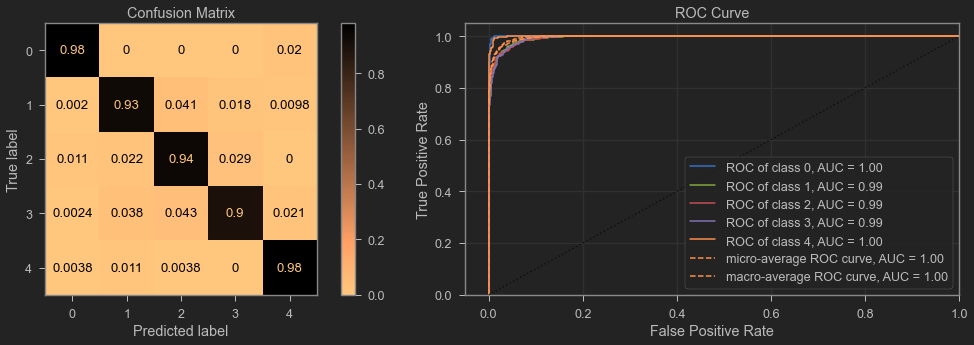

In [27]:
# Random Forest
clf_rf = RandomForestClassifier(
    n_jobs=-1,
    criterion='entropy',
    min_samples_leaf=5,
    min_samples_split=6,
    class_weight='balanced_subsample',
)
fn.model_report_multiclass(clf_rf,
                           X_feat_imp_train,
                           y_feat_imp_train,
                           X_feat_imp_test,
                           y_feat_imp_test,
                           show_train_report=False)

Model fit is good with good performance metrics and no sign of overfitting. Prediction precision is over .90 for most of the classes expect cluster 3, which differs from model run to run based on train-test split, still close to .90 most of the time.

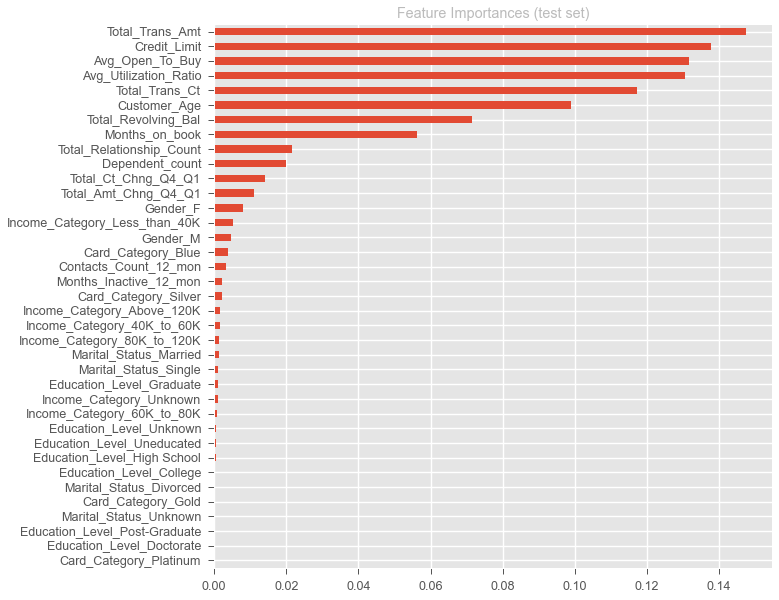

In [28]:
# Feature Importance
with plt.style.context('ggplot'):
    pd.Series(clf_rf.feature_importances_,
          index=X_feat_imp_test.columns).sort_values().plot(kind='barh',
                                                          figsize=(10, 10))
    plt.title('Feature Importances (test set)')

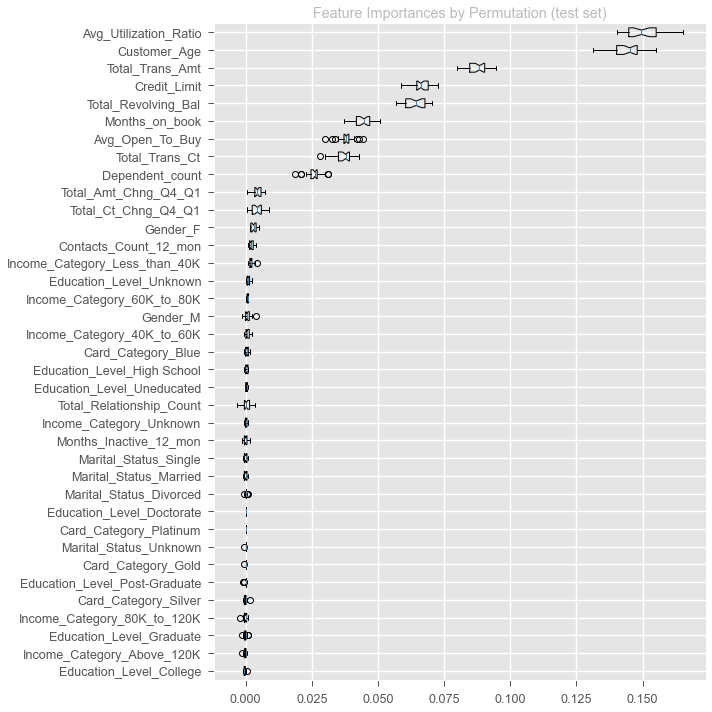

In [29]:
# Permutation Feature Importance
result = permutation_importance(clf_rf,
                                X_feat_imp_test,
                                y_feat_imp_test,
                                n_repeats=30,
                                random_state=42,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(result.importances[sorted_idx].T,
               notch=True,
               vert=False,
               labels=X_feat_imp_test.columns[sorted_idx])
    ax.set_title("Feature Importances by Permutation (test set)")
    fig.tight_layout()
    plt.show()

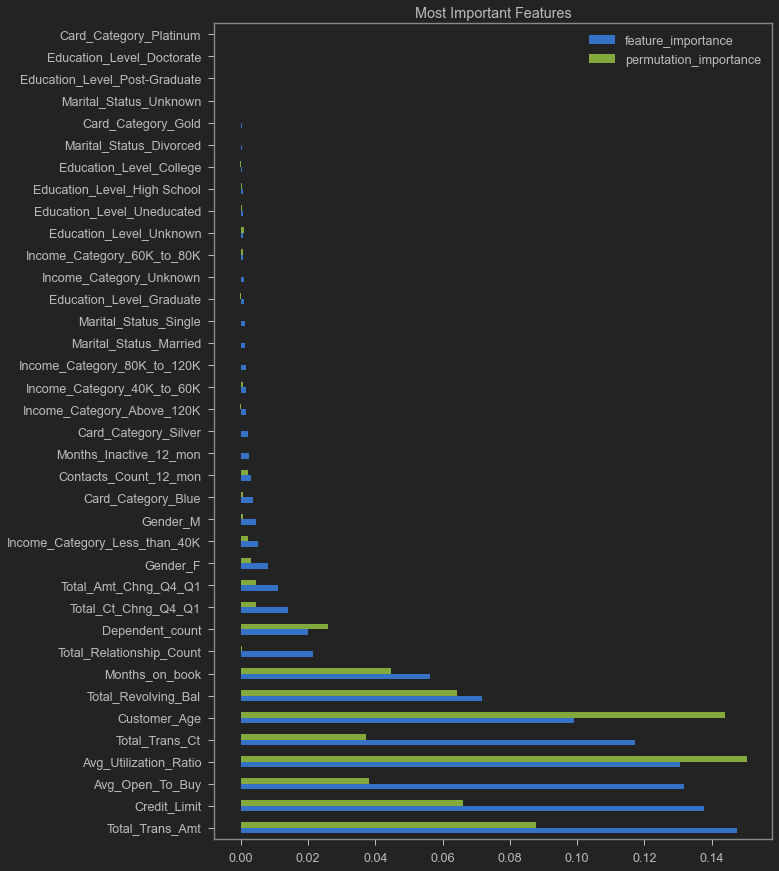

In [30]:
# fatures from the model
feature_importance = pd.Series(
    clf_rf.feature_importances_,
    index=X_feat_imp_test.columns).sort_values(ascending=False)

permutation_importance = pd.DataFrame(
    result.importances[sorted_idx].T,
    columns=X_feat_imp_test.columns[sorted_idx]).mean().sort_values(
        ascending=False)

important_features = pd.DataFrame([feature_importance,
                                   permutation_importance]).T
important_features.columns = ['feature_importance', 'permutation_importance']
important_features.plot(kind='barh',
                        figsize=(10, 15),
                        title="Most Important Features")
plt.show()

By looking at the above chart, these 10 features are selected as the most important features. Those will be explored in the later part of the notebook.

In [31]:
top_most_features = list(important_features[:10].index)
top_most_features

['Total_Trans_Amt',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Avg_Utilization_Ratio',
 'Total_Trans_Ct',
 'Customer_Age',
 'Total_Revolving_Bal',
 'Months_on_book',
 'Total_Relationship_Count',
 'Dependent_count']

### Segmentation Characteristics

In [32]:
characteristics_df = X.copy()
characteristics_df['target'] = y.copy()
characteristics_df['Clusters'] = cluster_df.Clusters
characteristics_df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target,Clusters
0,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,4
1,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,2
2,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,2
3,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,2
4,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0
10123,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1,2
10124,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1,1
10125,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1,1


In [33]:
print(f'Most frequent values in all the clusters: ')
# store data
out_dict = {}
# loop through all clusters
for cluster in range(0, n_clusters):
    # get cluster
    temp_df = characteristics_df.groupby(by='Clusters').get_group(cluster)
    # store temp data
    temp_dict = {}
    # loop though all columns
    for i in temp_df.columns:
        # get most frequent value and append
        temp_dict[i] = temp_df[i].value_counts().idxmax()
    # store in dict with cluster as key
    out_dict[cluster] = temp_dict
# convert to pandas dataframe
pd.DataFrame(out_dict)

Most frequent values in all the clusters: 


,0,1,2,3,4
Customer_Age,49,46,45,53,50
Gender,M,F,F,F,M
Dependent_count,2,3,3,1,3
Education_Level,Graduate,Graduate,Graduate,Graduate,Graduate
Marital_Status,Married,Married,Married,Married,Single
Income_Category,Less_than_40K,Less_than_40K,Less_than_40K,Less_than_40K,80K_to_120K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,36,36,36,36,36
Total_Relationship_Count,2,3,3,3,3
Months_Inactive_12_mon,3,3,3,3,3


In [34]:
# statistical info of each clusters
cluster_dict = dict(tuple(characteristics_df.groupby('Clusters')))
for i in range(n_clusters):
    print("Cluster " + str(i) + ' description:')
    display(fn.describe_dataframe(eval("cluster_dict[" + str(i) + "]")))

Cluster 0 description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Customer_Age,977.0,,,,45.34,7.64,27.0,41.0,46.0,51.0,63.0,int64,0
Gender,977.0,2,M,588,,,,,,,,object,0
Dependent_count,977.0,,,,2.34,1.29,0.0,1.0,2.0,3.0,5.0,int64,0
Education_Level,977.0,7,Graduate,312,,,,,,,,object,0
Marital_Status,977.0,4,Married,439,,,,,,,,object,0
Income_Category,977.0,6,Less_than_40K,272,,,,,,,,object,0
Card_Category,977.0,4,Blue,778,,,,,,,,object,0
Months_on_book,977.0,,,,35.21,7.66,13.0,31.0,36.0,40.0,56.0,int64,0
Total_Relationship_Count,977.0,,,,2.18,1.19,1.0,1.0,2.0,3.0,6.0,int64,0
Months_Inactive_12_mon,977.0,,,,2.22,0.98,1.0,1.0,2.0,3.0,6.0,int64,0


Cluster 1 description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Customer_Age,2717.0,,,,44.33,6.61,26.0,40.0,45.0,49.0,63.0,int64,0
Gender,2717.0,2,F,1583,,,,,,,,object,0
Dependent_count,2717.0,,,,2.58,1.22,0.0,2.0,3.0,3.0,5.0,int64,0
Education_Level,2717.0,7,Graduate,840,,,,,,,,object,0
Marital_Status,2717.0,4,Married,1207,,,,,,,,object,0
Income_Category,2717.0,6,Less_than_40K,1012,,,,,,,,object,0
Card_Category,2717.0,4,Blue,2646,,,,,,,,object,0
Months_on_book,2717.0,,,,34.23,6.57,13.0,31.0,36.0,38.0,51.0,int64,0
Total_Relationship_Count,2717.0,,,,3.86,1.49,1.0,3.0,4.0,5.0,6.0,int64,0
Months_Inactive_12_mon,2717.0,,,,2.42,0.98,0.0,2.0,2.0,3.0,6.0,int64,0


Cluster 2 description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Customer_Age,3061.0,,,,42.12,6.26,26.0,38.0,43.0,47.0,58.0,int64,0
Gender,3061.0,2,F,2090,,,,,,,,object,0
Dependent_count,3061.0,,,,2.65,1.25,0.0,2.0,3.0,4.0,5.0,int64,0
Education_Level,3061.0,7,Graduate,961,,,,,,,,object,0
Marital_Status,3061.0,4,Married,1412,,,,,,,,object,0
Income_Category,3061.0,6,Less_than_40K,1495,,,,,,,,object,0
Card_Category,3061.0,3,Blue,3039,,,,,,,,object,0
Months_on_book,3061.0,,,,31.99,6.51,13.0,28.0,34.0,36.0,49.0,int64,0
Total_Relationship_Count,3061.0,,,,4.0,1.49,1.0,3.0,4.0,5.0,6.0,int64,0
Months_Inactive_12_mon,3061.0,,,,2.28,1.01,0.0,2.0,2.0,3.0,6.0,int64,0


Cluster 3 description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Customer_Age,2000.0,,,,55.95,4.7,44.0,53.0,56.0,59.0,73.0,int64,0
Gender,2000.0,2,F,1155,,,,,,,,object,0
Dependent_count,2000.0,,,,1.4,1.08,0.0,1.0,1.0,2.0,5.0,int64,0
Education_Level,2000.0,7,Graduate,616,,,,,,,,object,0
Marital_Status,2000.0,4,Married,1072,,,,,,,,object,0
Income_Category,2000.0,6,Less_than_40K,781,,,,,,,,object,0
Card_Category,2000.0,3,Blue,1969,,,,,,,,object,0
Months_on_book,2000.0,,,,44.59,6.08,30.0,40.0,45.0,49.0,56.0,int64,0
Total_Relationship_Count,2000.0,,,,4.17,1.43,1.0,3.0,4.0,5.0,6.0,int64,0
Months_Inactive_12_mon,2000.0,,,,2.41,1.08,0.0,2.0,2.0,3.0,6.0,int64,0


Cluster 4 description:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
Customer_Age,1372.0,,,,46.34,6.6,26.0,42.0,46.0,51.0,65.0,int64,0
Gender,1372.0,2,M,1231,,,,,,,,object,0
Dependent_count,1372.0,,,,2.58,1.22,0.0,2.0,3.0,3.0,5.0,int64,0
Education_Level,1372.0,7,Graduate,399,,,,,,,,object,0
Marital_Status,1372.0,4,Single,565,,,,,,,,object,0
Income_Category,1372.0,6,80K_to_120K,569,,,,,,,,object,0
Card_Category,1372.0,4,Blue,1004,,,,,,,,object,0
Months_on_book,1372.0,,,,35.96,6.72,13.0,32.0,36.0,39.0,56.0,int64,0
Total_Relationship_Count,1372.0,,,,3.93,1.52,1.0,3.0,4.0,5.0,6.0,int64,0
Months_Inactive_12_mon,1372.0,,,,2.31,0.97,0.0,2.0,2.0,3.0,6.0,int64,0


#### intra cluster EDA

Exploration of clusters with an interactive plot.

In [35]:
@interact(Cluster=cluster_dict.keys())
def show_clusters(Cluster):
    fn.cluster_insights(cluster_dict[Cluster])

interactive(children=(Dropdown(description='Cluster', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_class…

#### inter cluster EDA

Exploring features among clusters based on the insights from the feature importance from the previous part of the analysis. Only the most important features decided at the previous part are explored.

##### Cluster Distribution

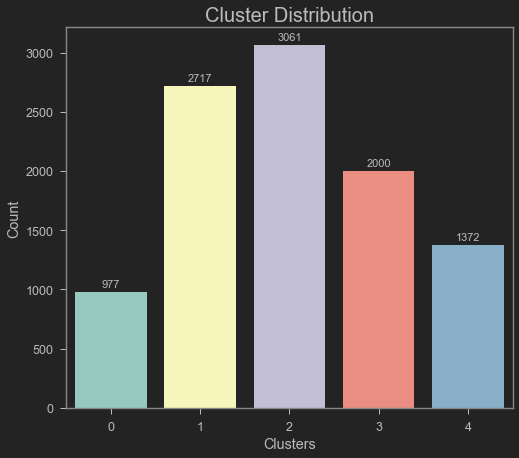

In [36]:
plot_data = characteristics_df.groupby(
    'Clusters').count()['target'].sort_index(ascending=False).reset_index()
plots = sns.barplot(y='target',
                    x='Clusters',
                    data=plot_data,
                    orient='v',
                    palette='Set3')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center',
                   va='center',
                   size=11,
                   xytext=(0, 8),
                   textcoords='offset points')
plt.ylabel("Count")
plt.title("Cluster Distribution", size=20)
plt.show()

Cluster 0 has the lowest member. Cluster 1 and 2 are fairly similar sized. Cluster 3 and 4 have moderate members.

In [37]:
plot_data = characteristics_df.groupby(['Clusters', 'target'
                                        ]).count()['Gender'].reset_index()
plot_data['target'] = plot_data['target'].map({
    0: 'Existing Customer',
    1: 'Attrited Customer'
})
plot_data['Clusters'] = plot_data['Clusters'].astype('str')
fig = px.bar(plot_data,
             x='target',
             y='Gender',
             color='Clusters',
             template='presentation',
             barmode='group',
             text='Gender',
             color_discrete_sequence=[
                 '#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3'
             ],
             title='Cluster Size by Chruning')
fig.update_xaxes(showline=True,
                 linewidth=2,
                 linecolor='black',
                 mirror=True,
                 title={'text': ''})
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True, title={'text': 'Counts'})
fig.show()

##### with churn info

All the features are explored with respect of churning.

In [48]:
@interact(Cluster=fixed(characteristics_df),
          feature=characteristics_df.columns)
def show_clusters(Cluster, feature='Customer_Age'):
    fig = px.histogram(Cluster,
                       x=feature,
                       marginal="box",
                       template='presentation',
                       color='Clusters',
                       facet_col='target',
                       color_discrete_sequence=px.colors.qualitative.Dark2,
                       barmode='group',
                       title=f'"{feature}" seperated by Clusters',
                       hover_data=Cluster)
    fig.show()
    pass

interactive(children=(Dropdown(description='feature', options=('Customer_Age', 'Gender', 'Dependent_count', 'E…

In [49]:
@interact(Cluster=fixed(characteristics_df),
          feature=characteristics_df.columns)
def show_clusters(Cluster, feature='Customer_Age'):
    fig = px.histogram(
        data_frame=Cluster,
        x=feature,
        marginal="box",
        template='presentation',
        color='target',
        facet_col='Clusters',
        color_discrete_sequence=px.colors.qualitative.Dark2,
        barmode='group',
        category_orders={'Clusters': list(np.arange(0, n_clusters))},
        title=f'"{feature.replace("_"," ")}" seperated by Clusters',
        hover_data=Cluster)
    fig.update_xaxes(showline=True,
                     linewidth=1,
                     linecolor='black', title={'text': ''})
#     fig.update_yaxes(title={'text': ''})
    fig.update_layout(annotations=list(fig.layout.annotations) + [
        go.layout.Annotation(x=0.5,
                             y=-0.22,
                             font=dict(size=14),
                             showarrow=False,
                             text=f"{feature}s",
                             textangle=0,
                             xref="paper",
                             yref="paper")
    ])
    fig.show()
    pass

interactive(children=(Dropdown(description='feature', options=('Customer_Age', 'Gender', 'Dependent_count', 'E…

Summary of exploring clusters by the most important features. This is done by interpreting results and taking note to create a summary table. All the intra-cluster and intra-cluster plots are considered for this. For this purpose Microsoft Excel is used.

<br>

|  Variable  | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 | Churn | Comment |  Description  |
|---|---|---|---|---|---|---|---|---|
|  Avg_Open_To_Buy  | spread | low | low | low | high value | 1 | Majority values   are low |  Open to Buy Credit Line (Average of last 12   months)  |
|  Avg_Utilization_Ratio  | low utilization | minimal low utilization | no low utilization ratio | med utilization | low utilization | 1 | Majority values are low |  Average Card Utilization Ratio  |
|  Card_Category  |  |  |  |  |  | 1 | High class   imbalance to comment | Type   of Card (Blue, Silver, Gold, Platinum)  |
|  Contacts_Count_12_mon  |  |  |  |  |  | 1 | 3 |  No. of Contacts in the last 12 months  |
|  Credit_Limit  | all clients   from2k  | mostly low   limit | 2k to 4k, no   high limit |  | high limit,   above 14k | 1 |  |  Credit Limit on the Credit Card  |
|  Customer_Age  | similar | similar | similar | older | similar | 3 |  | Customer's Age in Years  |
|  Dependent_count  | spread | spread | spread | low | spread | 1 | count 3 and 4   is risky |  Number of dependents  |
|  Education_Level  | Graduate | Graduate | College | College | Uneducated | 1 | Graduates >HS >= Unknown>=Uneducated, PG and PhD   is less likely | Educational Qualification of the account   holder (example: high school, college graduate, etc.)  |
|  Gender  | M | F | F | F | M | 1 | Females is   risky | M=Male,   F=Female  |
|  Income_Category  | Less_than_40K | 40K_to_60K | 40K_to_60K | Less_than_40K | Unknown | 1 | Less than 40K | Annual Income Category of the account   holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K,   Unknown)  |
|  Marital_Status  | Unknown | Single | Married | Married | Unknown | 1 | Majority values   is Married | Married,   Single, Unknown , Divorced |
|  Months_Inactive_12_mon  |  |  |  |  |  | 1 | 3 |  No. of months inactive in the last 12   months  |
|  Months_on_book  | good | similar | similar | loyal customer | similar | 3 |  | Time   of Relationship |
|  Total_Amt_Chng_Q4_Q1  |  |  |  |  |  | 1 | High frequency if transaction |  Change in Transaction Amount (Q4 over   Q1)   |
|  Total_Ct_Chng_Q4_Q1  |  |  |  |  |  | 1 |  |  Change in Transaction Count (Q4 over   Q1)   |
|  Total_Relationship_Count  | low | high | high | high | high | 1 | 2 and 3 are most   frequent |  Total no. of products held by the   customer  |
|  Total_Revolving_Bal  | spread | low | mod | spread | spread | 1 | Majority values   are low |  Total Revolving Balance on the Credit   Card  |
|  Total_Trans_Amt  | High transaction amount | low | mid amount till 5k high feq transaction | mid amount till 5k high feq transaction | mid amount till 5k med feq transaction | 1 | low amounts |  Total Transaction Amount (Last 12   months)  |
|  Total_Trans_Ct  | heavy user | moderate user | moderate user | moderate user | moderate user | 1 | Majority values   are between 30 to 50 |  Total Transaction Count (Last 12   months)  |

# INTERPRET 

## Customer Segmentation model

Based on analysis from the segmentation part and exploration of the clusters, they can be be identified as following:

- Cluster 0: Low value frequent users of services.
- Cluster 1: High risk clients segmentation.
- Cluster 2: Regular clients.
- Cluster 3: Most loyal clients. (mostly consists of older clients)
- Cluster 4: High value clients.

NOTE: labels can change on different runs.